In [19]:
import numpy as np
import pandas as pd
from datetime import datetime
from fuzzywuzzy import process, fuzz
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [20]:
#import book dataset
df=pd.read_csv("C:/Users/romai/Documents/DSTI/4-Python Labs/Project/Python/dataset/books_v2.csv", index_col="bookID", on_bad_lines = 'error')

#Needed Cells from Cleaning

In [131]:
#move to FE
#Renaming '  num_pages' in order to remove the extra spaces and displaying columns names
df.rename(columns={'  num_pages':'num_pages'}, inplace=True)

In [132]:
df['language_code'] = df['language_code'].replace('en-US','eng')
df['language_code'] = df['language_code'].replace('en-GB','eng')
df['language_code'] = df['language_code'].replace('en-CA','eng')

In [133]:
pub = df.publisher.unique()
elements = list(pub)
# elements = ['vikash', 'vikas', 'Vinod', 'Vikky', 'Akash', 'Vinodh', 'Sachin', 'Salman', 'Ajay', 'Suchin', 'vIkas', 'salman', 'salMa', 'Akash', 'vikahs']

results = [[name, [], 0] for name in elements]

for (i, element) in enumerate(elements):
    for (j, choice) in enumerate(elements[i+1:]):
        if fuzz.ratio(element, choice) >= 90:
            results[i][2] += 1
            results[i][1].append(choice)
            results[j+i+1][2] += 1
            results[j+i+1][1].append(element)

data = pd.DataFrame(results, columns=['name', 'duplicates', 'duplicate_count'])

data = data.sort_values(by=['duplicate_count'],ascending=False)

KeyboardInterrupt: 

In [6]:
to_remove = []
test = {}

for i,j in data.iterrows():
    if data.name[i] in list(test.keys()):
        for x in j.duplicates:
            if x not in test : 
                test[x]=test[data.name[i]]
    else : 
        test[data.name[i]] = data.name[i]
        for x in j.duplicates:
            if x not in test : 
                test[x]=data.name[i]
#                 print(data.name[i], "****", x,"--" , data.name[i])
        

                    
# print(test)
data['pub'] = data['name'].map(test)
display(data)

name  \
102          W. W. Norton & Company   
815            W.W. Norton  Company   
120           W. W. Norton  Company   
1722        Farrar  Straus & Giroux   
1419       W. W. Norton and Company   
...                             ...   
825               Albury Publishing   
824     Little  Brown Young Readers   
823   Random House Value Publishing   
822                   Holt McDougal   
2291             Editorial Presença   

                                             duplicates  duplicate_count  \
102   [W. W. Norton  Company, W.W. Norton & Company,...                4   
815   [W. W. Norton & Company, W. W. Norton  Company...                4   
120   [W. W. Norton & Company, W.W. Norton & Company...                4   
1722  [Farrar  Straus and Giroux, Farrar Straus Giro...                3   
1419  [W. W. Norton & Company, W. W. Norton  Company...                3   
...                                                 ...              ...   
825                                                  []                0   
824                                                  []                0   
823                                                  []                0   
822                                                  []                0   
2291                                                 []                0   

                                pub  
102          W. W. Norton & Company  
815          W. W. Norton & Company  
120          W. W. Norton & Company  
1722        Farrar  Straus & Giroux  
1419         W. W. Norton & Company  
...                             ...  
825               Albury Publishing  
824     Little  Brown Young Readers  
823   Random House Value Publishing  
822                   Holt McDougal  
2291             Editorial Presença  

[2292 rows x 4 columns]

In [7]:
df['publisher_iso'] = df['publisher'].map(test)

In [8]:
df

bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11122   45631   Expelled from Eden: A William T. Vollmann Reader   
11123   45633                        You Bright and Risen Angels   
11124   45634                    The Ice-Shirt (Seven Dreams #1)   
11125   45639                                        Poor People   
11126   45641                        Las aventuras de Tom Sawyer   

                                                 authors  average_rating  \
0                             J.K. Rowling/Mary GrandPré            4.57   
1                             J.K. Rowling/Mary GrandPré            4.49   
2                                           J.K. Rowling            4.42   
3                             J.K. Rowling/Mary GrandPré            4.56   
4                             J.K. Rowling/Mary GrandPré            4.78   
...                                                  ...             ...   
11122  William T. Vollmann/Larry McCaffery/Michael He...            4.06   
11123                                William T. Vollmann            4.08   
11124                                William T. Vollmann            3.96   
11125                                William T. Vollmann            3.72   
11126                                         Mark Twain            3.91   

             isbn        isbn13 language_code  num_pages  ratings_count  \
0       439785960  9.780440e+12           eng        652        2095690   
1       439358078  9.780440e+12           eng        870        2153167   
2       439554896  9.780440e+12           eng        352           6333   
3      043965548X  9.780440e+12           eng        435        2339585   
4       439682584  9.780440e+12           eng       2690          41428   
...           ...           ...           ...        ...            ...   
11122  1560254416  9.781560e+12           eng        512            156   
11123   140110879  9.780140e+12           eng        635            783   
11124   140131965  9.780140e+12           eng        415            820   
11125    60878827  9.780060e+12           eng        434            769   
11126  8497646983  9.788500e+12           spa        272            113   

       text_reviews_count publication_date        publisher     publisher_iso  
0                   27591        9/16/2006  Scholastic Inc.  Scholastic  Inc.  
1                   29221         09-01-04  Scholastic Inc.  Scholastic  Inc.  
2                     244         11-01-03       Scholastic        Scholastic  
3                   36325         05-01-04  Scholastic Inc.  Scholastic  Inc.  
4                     164        9/13/2004       Scholastic        Scholastic  
...                   ...              ...              ...               ...  
11122                  20       12/21/2004    Da Capo Press     Da Capo Press  
11123                  56         12-01-88    Penguin Books     Penguin Books  
11124                  95         08-01-93    Penguin Books     Penguin Books  
11125                 139        2/27/2007             Ecco              Ecco  
11126                  12        5/28/2006    Edimat Libros     Edimat Libros  

[11127 rows x 13 columns]

# Visualization
to be added in EDA 

## Rating distribution

**move to EDA (part of description)**

<function matplotlib.pyplot.show(close=None, block=None)>

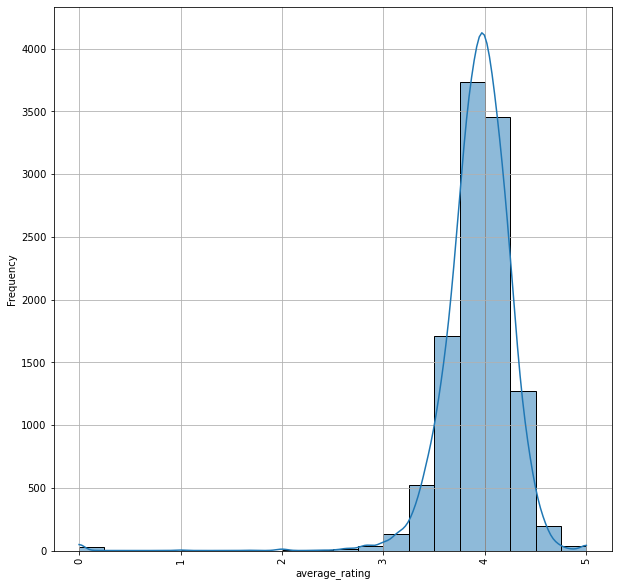

In [11]:
plt.figure(figsize=(10,10))
sns.histplot(df['average_rating'], kde = True, bins = 20, palette = "hls" )
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.grid()
plt.show

--> Median= 3.9/4 as showed in the describe table

## Categorizing average rating and creating an extra column

In [11]:
bins = [0, 1, 2, 3, 4, 5]
label = ['<1', '1-2', '2-3', '3-4', '4-5']
df['cat_rating'] = pd.cut(df['average_rating'], bins, labels=label)

In [12]:
rating_frequency = df["cat_rating"].value_counts()
print((rating_frequency))

3-4    6288
4-5    4735
2-3      69
1-2       7
<1        2
Name: cat_rating, dtype: int64


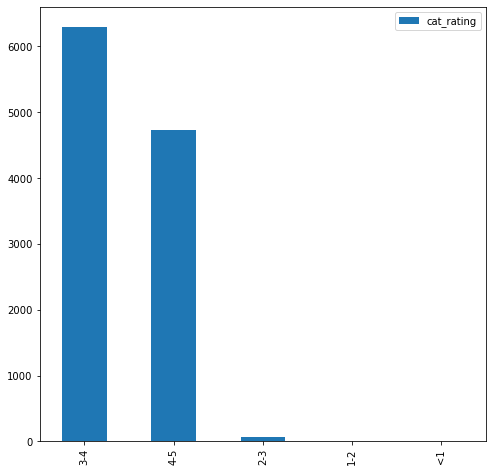

In [13]:
# Chart for average rating by category 
# Adding the % for the histogram (couldn't)

hist = df['cat_rating'].value_counts().plot(kind = 'bar', figsize=(8, 8)).legend()


In [14]:
# Move to exploratory part 
high_rated_author = df[df['average_rating']>=4.4]
high_rated_author

bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
10922   44734  Fullmetal Alchemist  Vol. 6 (Fullmetal Alchemi...   
10941   44826  The Price of the Ticket: Collected Nonfiction ...   
10944   44849  Code Check Electrical: An Illustrated Guide to...   
10971   44972                      Bob Marley - Songs of Freedom   
11008   45161                    The Roald Dahl Audio Collection   

                                                authors  average_rating  \
0                            J.K. Rowling/Mary GrandPré            4.57   
1                            J.K. Rowling/Mary GrandPré            4.49   
2                                          J.K. Rowling            4.42   
3                            J.K. Rowling/Mary GrandPré            4.56   
4                            J.K. Rowling/Mary GrandPré            4.78   
...                                                 ...             ...   
10922                     Hiromu Arakawa/Akira Watanabe            4.58   
10941                                     James Baldwin            4.70   
10944  Michael      Casey/Redwood Kardon/Douglas Hansen            4.67   
10971                                        Bob Marley            4.48   
11008                                        Roald Dahl            4.41   

             isbn        isbn13 language_code  num_pages  ratings_count  \
0       439785960  9.780440e+12           eng        652        2095690   
1       439358078  9.780440e+12           eng        870        2153167   
2       439554896  9.780440e+12           eng        352           6333   
3      043965548X  9.780440e+12           eng        435        2339585   
4       439682584  9.780440e+12           eng       2690          41428   
...           ...           ...           ...        ...            ...   
10922  1421503190  9.781420e+12           eng        200          10052   
10941   312643063  9.780310e+12           eng        712            404   
10944  1561587389  9.781560e+12           eng         29              3   
10971   793536693  9.780790e+12           eng        200             16   
11008    61214965  9.780060e+12           eng          4            199   

       text_reviews_count publication_date  \
0                   27591        9/16/2006   
1                   29221         09-01-04   
2                     244         11-01-03   
3                   36325         05-01-04   
4                     164        9/13/2004   
...                   ...              ...   
10922                 201        3/21/2006   
10941                  30        9/15/1985   
10944                   0         11-11-05   
10971                   1         12-01-95   
11008                  36        2/20/2007   

                                publisher                       publisher_iso  \
0                         Scholastic Inc.                    Scholastic  Inc.   
1                         Scholastic Inc.                    Scholastic  Inc.   
2                              Scholastic                          Scholastic   
3                         Scholastic Inc.                    Scholastic  Inc.   
4                              Scholastic                          Scholastic   
...                                   ...                                 ...   
10922                       VIZ Media LLC                       VIZ Media LLC   
10941                  St. Martin's Press                  St. Martin's Press   
10944                       Taunton Press                       Taunton Press   
10971  Hal Leonard Publis

The same title has the same avg rating but all other columns are different 


In [15]:
df.loc[df['title'] == "The Odyssey"]

bookID        title                                  authors  \
410     1381  The Odyssey         Homer/Robert Fagles/Bernard Knox   
411     1382  The Odyssey  Homer/Robert Fitzgerald/D.S. Carne-Ross   
412     1383  The Odyssey                 Homer/Richmond Lattimore   
413     1384  The Odyssey  Homer/E.V. Rieu/Peter Jones/D.C.H. Rieu   
414     1387  The Odyssey                       Homer/W.H.D. Rouse   
5329   19282  The Odyssey    Homer/Robert Fitzgerald/Seamus Heaney   
6986   26447  The Odyssey  Homer/Edward McCrorie/Richard P. Martin   
9520   37804  The Odyssey              Homer/George Herbert Palmer   

      average_rating        isbn        isbn13 language_code  num_pages  \
410             3.76   143039954  9.780140e+12           eng        541   
411             3.76   374525749  9.780370e+12           eng        515   
412             3.76    60931957  9.780060e+12           eng        374   
413             3.76   140449116  9.780140e+12           eng        324   
414             3.76   451527364  9.780450e+12           eng        304   
5329            3.76  1857150945  9.781860e+12           eng        509   
6986            3.76   801882672  9.780800e+12           eng        472   
9520            3.76   486406547  9.780490e+12           eng        239   

      ratings_count  text_reviews_count publication_date  \
410          760871                6557       11/30/2006   
411            1713                 179         11-05-98   
412            1131                  78         06-01-99   
413            2543                 167        1/30/2003   
414             262                  24         08-01-99   
5329             48                   3         10-08-92   
6986             57                   2        8/23/2005   
9520            242                  25       12/23/1998   

                           publisher                   publisher_iso  \
410                 Penguin Classics                 Penguin Classic   
411        Farrar  Straus and Giroux         Farrar  Straus & Giroux   
412                 Harper Perennial                 HarperPerennial   
413                 Penguin Classics                 Penguin Classic   
414                  Signet Classics                 Signet Classics   
5329                        Everyman                        Everyman   
6986  Johns Hopkins University Press  Johns Hopkins University Press   
9520              Dover Publications              Dover Publications   

     cat_rating  
410         3-4  
411         3-4  
412         3-4  
413         3-4  
414         3-4  
5329        3-4  
6986        3-4  
9520        3-4

## 10 Most published authors 

<AxesSubplot:xlabel='authors'>

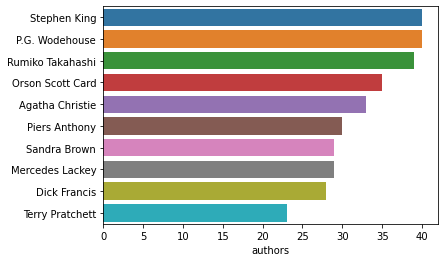

In [36]:
count_authors = df['authors'].value_counts().head(10)
count_authors
sns.barplot(x = count_authors, y = count_authors.index)

## TOP 10 publisher (before and after)

In [17]:
df.publisher_iso.value_counts()

Vintage                         318
Penguin Books                   261
Penguin Classic                 185
Mariner Books                   150
Oxford University Press  USA    148
                               ... 
Northwestern Univ Press           1
Ace/SFBC                          1
C. Bange                          1
Rebel Press                       1
Clarity Press                     1
Name: publisher_iso, Length: 2144, dtype: int64

<AxesSubplot:xlabel='publisher'>

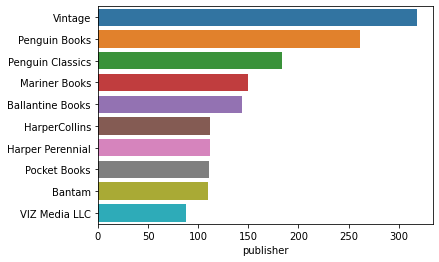

In [18]:
count_publisher = df['publisher'].value_counts().head(10)
sns.barplot(x = count_publisher, y = count_publisher.index)

<AxesSubplot:xlabel='publisher_iso'>

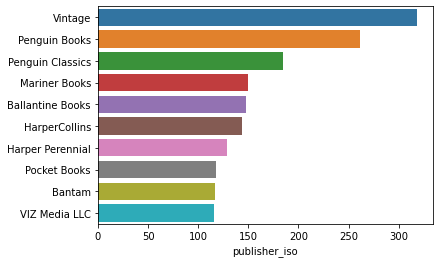

In [19]:
count_publisher_iso = df['publisher_iso'].value_counts().head(10)
sns.barplot(x = count_publisher_iso, y = count_publisher.index)

## TOP 5 Languages

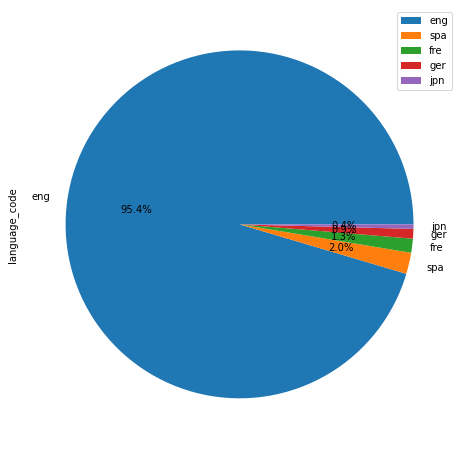

In [20]:
df['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

## Count per series (same title)

<AxesSubplot:xlabel='title'>

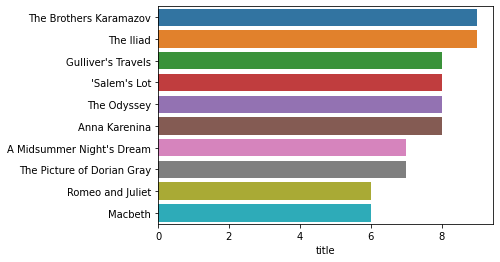

In [21]:
count_title = df.title.value_counts()[:10]
sns.barplot(x = count_title, y = count_title.index)

## Outliers

In [5]:
#Checking for Outliers columns: num_pages, Text Reviews Count, ratings_count
#num_pages Violin Plot 
fig = px.violin(df.num_pages, y="num_pages")
fig.show()

#Text Reviews Count Violin Plot 
fig2 = px.violin(df.text_reviews_count, y="text_reviews_count")
fig2.show()

#Ratings Count(in million) Violin Plot 
fig3 = px.violin(df.ratings_count, y="ratings_count")
fig3.show()

# Correlation

## Average Rating (>=4.4) //  10 authors

In [38]:
df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')

title
authors                           
P.G. Wodehouse                  40
Stephen King                    40
Rumiko Takahashi                39
Orson Scott Card                35
Agatha Christie                 33
Piers Anthony                   30
Mercedes Lackey                 29
Sandra Brown                    29
Dick Francis                    28
Margaret Weis/Tracy Hickman     23

Text(0, 0.5, 'Authors')

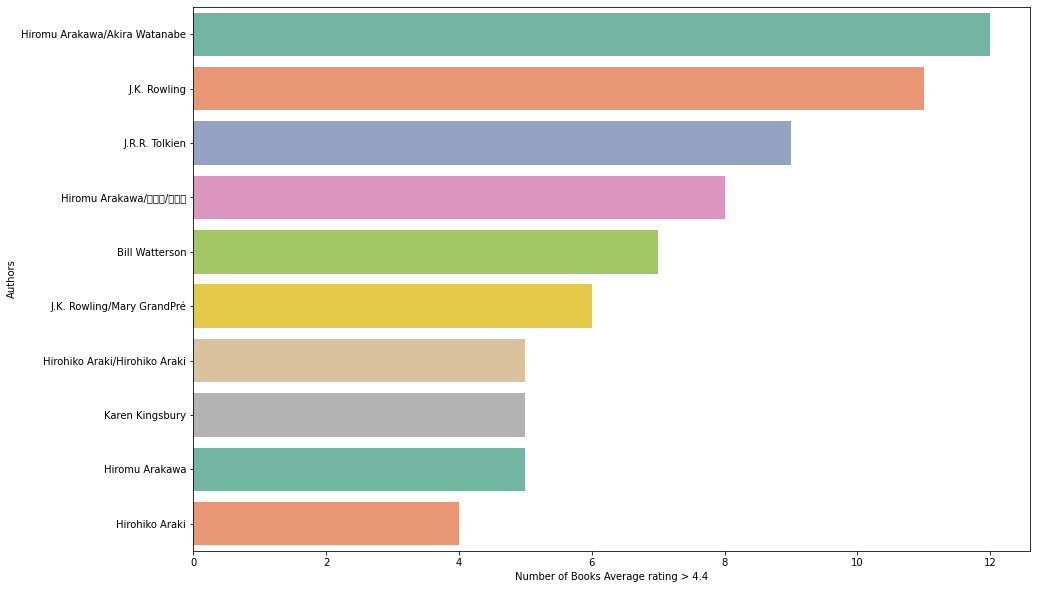

In [23]:
high_rated_title = df[df['average_rating']>=4.4]
high_rated_author = high_rated_title.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books Average rating > 4.4")
ax.set_ylabel("Authors")


## Average Rating (>=4.4) // publisher 

Text(0, 0.5, 'Publisher')

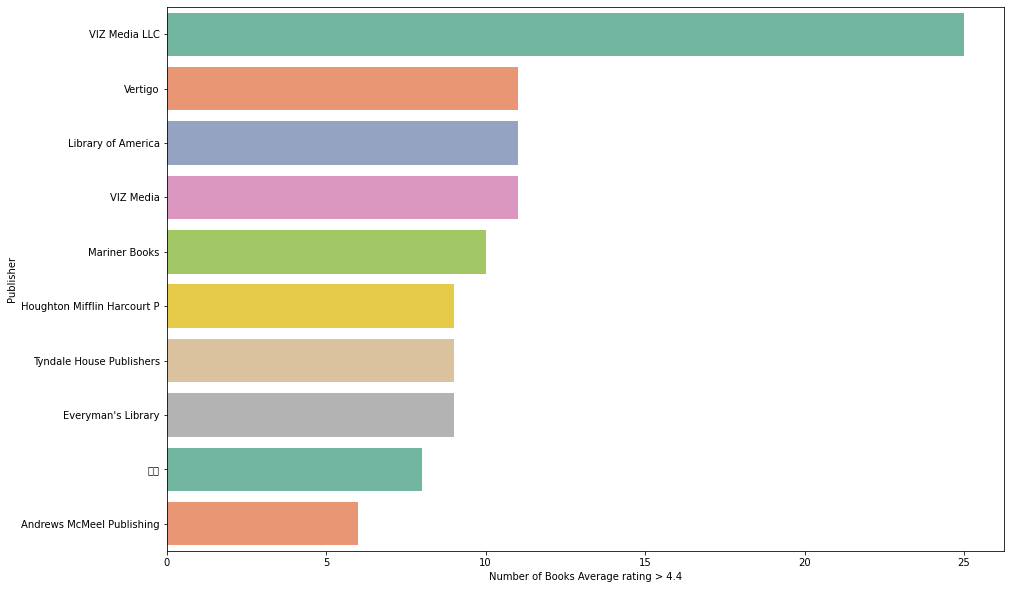

In [24]:
high_rated_title = df[df['average_rating']>=4.4]
high_rated_publisher = high_rated_title.groupby('publisher_iso')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('publisher_iso')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_publisher['title'], high_rated_publisher.index, palette='Set2')
ax.set_xlabel("Number of Books Average rating > 4.4")
ax.set_ylabel("Publisher")

***
**MOVE TO EDA** (below)

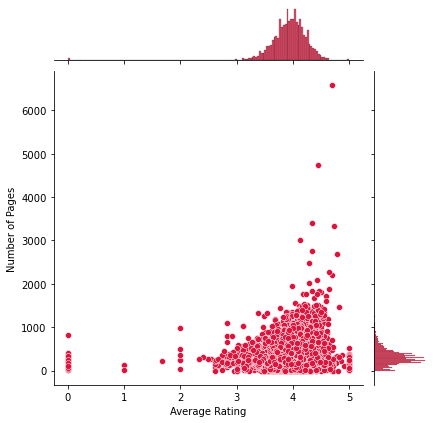

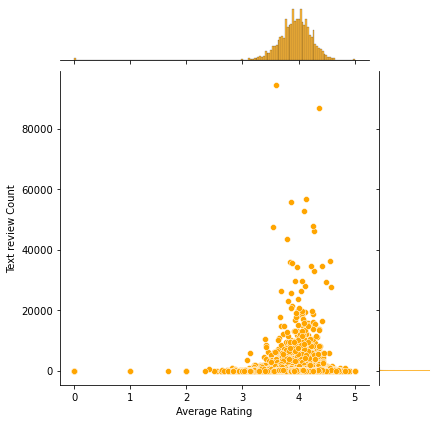

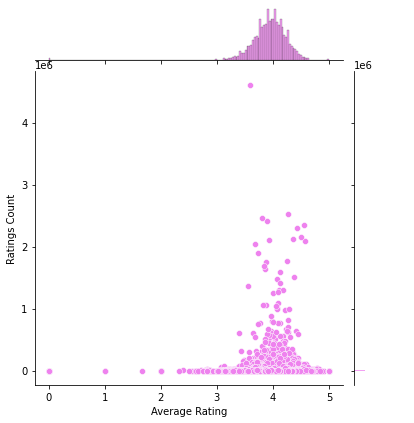

In [101]:
### Average Rating // number of pages
ax1 = sns.jointplot(x="average_rating", y="num_pages", data = df, color = 'crimson')
ax1.set_axis_labels("Average Rating", "Number of Pages")

#Average Rating // Text Review Count
ax2 = sns.jointplot(x="average_rating", y="text_reviews_count", data = df, color = 'orange')
ax2.set_axis_labels("Average Rating", "Text review Count")

#Average Rating // Reviews Count
ax2 = sns.jointplot(x="average_rating", y="ratings_count", data = df, color = 'violet')
ax2.set_axis_labels("Average Rating", "Ratings Count")


#plt.show()

## Average Rating // languages

In [26]:
df.groupby('language_code')['average_rating'].agg(['mean','count'])

mean  count
language_code                 
ale            4.360000      1
ara            3.550000      1
eng            3.930845  10541
enm            3.873333      3
fre            3.971528    144
ger            3.950101     99
gla            4.470000      1
glg            3.360000      1
grc            3.707273     11
ita            4.078000      5
jpn            4.268696     46
lat            4.353333      3
msa            4.110000      1
mul            4.126316     19
nl             4.180000      1
nor            3.600000      1
por            3.945000     10
rus            4.255000      2
spa            3.929312    218
srp            0.000000      1
swe            3.455000      2
tur            4.420000      1
wel            5.000000      1
zho            4.456429     14

# Feature Engineering:
- Delete Unnecessary columns 
- Filling missing values 
- Dropping outliers for columns: num_pages, ratings count, Text review Count

In [21]:
#Renaming '  num_pages' in order to remove the extra spaces and displaying columns names
df.rename(columns={'  num_pages':'num_pages'}, inplace=True)

In [22]:
#Dropping useless columns: isbn and isbn13
df = df.drop(columns = ['isbn','isbn13'])

In [23]:
#Dropping Authors = "NOT A BOOK"
#df = df.drop(df[df.authors == "NOT A BOOK"].index)
#df[df.authors == 'NOT A BOOK']

#NOT A BOOK are audio book so keep (see part on PAGES)

In [24]:
df.head(2)

title  \
bookID                                                      
1       Harry Potter and the Half-Blood Prince (Harry ...   
2       Harry Potter and the Order of the Phoenix (Har...   

                           authors  average_rating language_code  num_pages  \
bookID                                                                        
1       J.K. Rowling/Mary GrandPré            4.57           eng        652   
2       J.K. Rowling/Mary GrandPré            4.49           eng        870   

        ratings_count  text_reviews_count publication_date        publisher  
bookID                                                                       
1             2095690               27591        9/16/2006  Scholastic Inc.  
2             2153167               29221       09/01/2004  Scholastic Inc.

## Title

## Authors

In [25]:
# single author vs multiple authors -> new column "Authors_2" = Single/Multiple -> boolean
df['number_of_authors']=np.where(df['authors'].str.split(pat="/").str.len()==1, "single", "multiple")

#keep 1st author in case of multiple authors and analyze correlation
df['primary_author']=df['authors'].str.split(pat="/").str[0]

df.head(3)

title  \
bookID                                                      
1       Harry Potter and the Half-Blood Prince (Harry ...   
2       Harry Potter and the Order of the Phoenix (Har...   
4       Harry Potter and the Chamber of Secrets (Harry...   

                           authors  average_rating language_code  num_pages  \
bookID                                                                        
1       J.K. Rowling/Mary GrandPré            4.57           eng        652   
2       J.K. Rowling/Mary GrandPré            4.49           eng        870   
4                     J.K. Rowling            4.42           eng        352   

        ratings_count  text_reviews_count publication_date        publisher  \
bookID                                                                        
1             2095690               27591        9/16/2006  Scholastic Inc.   
2             2153167               29221       09/01/2004  Scholastic Inc.   
4                6333                 244       11/01/2003       Scholastic   

       number_of_authors primary_author  
bookID                                   
1               multiple   J.K. Rowling  
2               multiple   J.K. Rowling  
4                 single   J.K. Rowling

In [26]:
df.groupby(["number_of_authors"]).describe().average_rating

count      mean       std  min     25%   50%   75%  max
number_of_authors                                                          
multiple           4564.0  3.964963  0.357029  0.0  3.8075  3.99  4.17  5.0
single             6563.0  3.911842  0.347588  0.0  3.7500  3.94  4.11  5.0

***
Number of books an pages per authors and average rating

In [98]:
author=df.groupby('primary_author').agg({'average_rating':['count','mean'], 'num_pages':['mean']})
author.columns = [" ".join(x) for x in author.columns.ravel()]
author

average_rating count  average_rating mean  \
primary_author                                                     
A.B. Yehoshua                             2             3.600000   
A.D.P. Briggs                             1             3.760000   
A.E. Cunningham                           1             4.150000   
A.J. Jacobs                               1             3.760000   
A.M. Homes                                1             3.280000   
...                                     ...                  ...   
Zoë Heller                                2             3.710000   
bell hooks                                6             4.230000   
Åsne Seierstad                            3             3.763333   
Émile Zola                                9             3.971111   
Éric-Emmanuel Schmitt                     1             3.820000   

                       num_pages mean  
primary_author                         
A.B. Yehoshua              416.000000  
A.D.P. Briggs              256.000000  
A.E. Cunningham            232.000000  
A.J. Jacobs                389.000000  
A.M. Homes                 256.000000  
...                               ...  
Zoë Heller                 251.000000  
bell hooks                 188.000000  
Åsne Seierstad             291.333333  
Émile Zola                 459.444444  
Éric-Emmanuel Schmitt       85.000000  

[4219 rows x 3 columns]

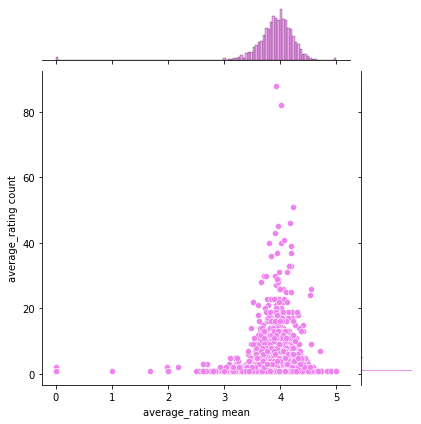

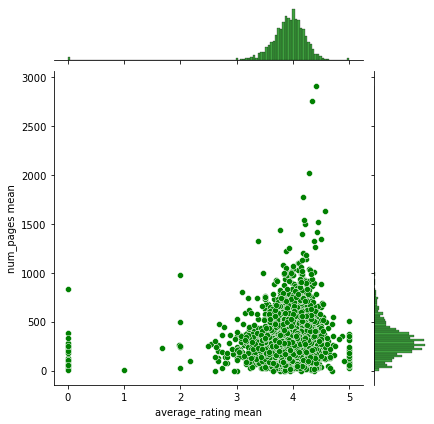

In [107]:
ax3 = sns.jointplot(y="average_rating count", x="average_rating mean", data = author, color = 'violet')
ax4 = sns.jointplot(y="num_pages mean", x="average_rating mean", data = author, color = 'green')

plt.show()

***
Average number of pages per author and average rating

In [82]:
author_page=df.groupby('primary_author')['num_pages'].mean()
frames=[author_page, author]
pd.concat(frames,axis=1).sort_values('count', ascending = False)

num_pages  count      mean
primary_author                                     
William Shakespeare     308.329545     88  3.930682
Stephen King            420.207317     82  4.003537
J.R.R. Tolkien          500.352941     51  4.223137
P.G. Wodehouse          278.282609     46  4.164565
Agatha Christie         252.133333     45  3.957556
...                            ...    ...       ...
Janet Flanner           264.000000      1  3.850000
Janet Geringer Woititz  500.000000      1  4.090000
Janet S. Wong            40.000000      1  3.720000
Janet Wallach           464.000000      1  3.920000
Éric-Emmanuel Schmitt    85.000000      1  3.820000

[4219 rows x 3 columns]

## Publication_date

In [69]:
#Change the format of column "publication_date" 
# to match with standard date format then add 2 new columns "Month" and "Year" -> seasonality effect?
df['publication_date'] = pd.to_datetime(df['publication_date'], dayfirst = False, yearfirst = False, errors = 'coerce')

In [70]:
df.head(2)

title  \
bookID                                                      
1       Harry Potter and the Half-Blood Prince (Harry ...   
2       Harry Potter and the Order of the Phoenix (Har...   

                           authors  average_rating language_code  num_pages  \
bookID                                                                        
1       J.K. Rowling/Mary GrandPré            4.57           eng        652   
2       J.K. Rowling/Mary GrandPré            4.49           eng        870   

        ratings_count  text_reviews_count publication_date        publisher  \
bookID                                                                        
1             2095690               27591       2006-09-16  Scholastic Inc.   
2             2153167               29221       2004-09-01  Scholastic Inc.   

       number_of_authors primary_author  
bookID                                   
1               multiple   J.K. Rowling  
2               multiple   J.K. Rowling

In [71]:
df.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
number_of_authors     0
primary_author        0
dtype: int64

In [72]:
df.loc[df.publication_date.isna(),:]

title  \
bookID                                                      
31373   In Pursuit of the Proper Sinner (Inspector Lyn...   
45531          Montaillou  village occitan de 1294 à 1324   

                                                authors  average_rating  \
bookID                                                                    
31373                                 Elizabeth  George            4.10   
45531   Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie            3.96   

       language_code  num_pages  ratings_count  text_reviews_count  \
bookID                                                               
31373            eng        718          10608                 295   
45531            fre        640             15                   2   

       publication_date       publisher number_of_authors  \
bookID                                                      
31373               NaT    Bantam Books            single   
45531               NaT  Folio histoire          multiple   

                 primary_author  
bookID                           
31373         Elizabeth  George  
45531   Emmanuel Le Roy Ladurie

those 2 dates are unreal in the sense that
    # November doesn't have 31 days (11/31/2000)
    # June doesn't have 31 days (31/06/1982)
    
=> replace by correct date for those 2 rows

    #31373 published October 31, 2000 by Bantam Books (https://www.goodreads.com/book/show/31373.In_Pursuit_of_the_Proper_Sinner?ac=1&from_search=true&qid=3A5Zotzgsy&rank=1)
    
    #45531 published June 30, 1982 by Folio histoire (https://www.goodreads.com/book/show/45531.Montaillou_village_occitan_de_1294_1324)

In [73]:
#correcting 2 NaT by correct date
df.loc[31373,"publication_date"]='10/30/2000'
df.loc[45531,"publication_date"] ='6/30/1982'
df.loc[[31373,45531]]

title  \
bookID                                                      
31373   In Pursuit of the Proper Sinner (Inspector Lyn...   
45531          Montaillou  village occitan de 1294 à 1324   

                                                authors  average_rating  \
bookID                                                                    
31373                                 Elizabeth  George            4.10   
45531   Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie            3.96   

       language_code  num_pages  ratings_count  text_reviews_count  \
bookID                                                               
31373            eng        718          10608                 295   
45531            fre        640             15                   2   

       publication_date       publisher number_of_authors  \
bookID                                                      
31373        2000-10-30    Bantam Books            single   
45531        1982-06-30  Folio histoire          multiple   

                 primary_author  
bookID                           
31373         Elizabeth  George  
45531   Emmanuel Le Roy Ladurie

In [74]:
# Splitting date column into month and year columns - move in FE
df['publication_month'] = df['publication_date'].dt.strftime('%m')
df['publication_year'] = df['publication_date'].dt.strftime('%Y')

df.head(2)

title  \
bookID                                                      
1       Harry Potter and the Half-Blood Prince (Harry ...   
2       Harry Potter and the Order of the Phoenix (Har...   

                           authors  average_rating language_code  num_pages  \
bookID                                                                        
1       J.K. Rowling/Mary GrandPré            4.57           eng        652   
2       J.K. Rowling/Mary GrandPré            4.49           eng        870   

        ratings_count  text_reviews_count publication_date        publisher  \
bookID                                                                        
1             2095690               27591       2006-09-16  Scholastic Inc.   
2             2153167               29221       2004-09-01  Scholastic Inc.   

       number_of_authors primary_author publication_month publication_year  
bookID                                                                      
1               multiple   J.K. Rowling                09             2006  
2               multiple   J.K. Rowling                09             2004

In [75]:
print("Type of publication_month is:", df.publication_month.dtypes)
print("Type of publication_year is:",df.publication_year.dtypes)
#return type 'Object' -> convert to integer type

Type of publication_month is: object
Type of publication_year is: object


In [76]:
df['publication_month']=df.publication_month.astype(int)
df['publication_year']=df.publication_year.astype(int)

In [77]:
df.groupby(["publication_month"]).describe().average_rating

count      mean       std  min   25%    50%   75%   max
publication_month                                                          
1                  1058.0  3.935123  0.391895  0.0  3.79  3.970  4.14  5.00
2                   742.0  3.939677  0.310352  2.0  3.78  3.960  4.13  5.00
3                   832.0  3.917055  0.365252  0.0  3.78  3.940  4.11  5.00
4                   993.0  3.914642  0.321800  0.0  3.76  3.950  4.12  5.00
5                   923.0  3.891863  0.394633  0.0  3.75  3.930  4.10  5.00
6                   880.0  3.957250  0.325422  0.0  3.78  3.965  4.16  5.00
7                   786.0  3.915165  0.349827  0.0  3.76  3.940  4.12  5.00
8                   853.0  3.922626  0.349353  0.0  3.77  3.950  4.12  4.62
9                  1278.0  3.954734  0.349687  0.0  3.79  3.970  4.14  5.00
10                 1213.0  3.949242  0.323223  0.0  3.77  3.970  4.14  5.00
11                  846.0  3.978156  0.317933  0.0  3.80  3.990  4.17  5.00
12                  723.0  3.912434  0.414217  0.0  3.77  3.960  4.12  5.00

In [78]:
yearly_rating=df.groupby(["publication_year"]).describe().average_rating
yearly_rating

count      mean       std   min     25%   50%     75%   max
publication_year                                                             
1900                1.0  3.880000       NaN  3.88  3.8800  3.88  3.8800  3.88
1913                1.0  3.960000       NaN  3.96  3.9600  3.96  3.9600  3.96
1914                1.0  3.950000       NaN  3.95  3.9500  3.95  3.9500  3.95
1919                1.0  4.320000       NaN  4.32  4.3200  4.32  4.3200  4.32
1921                2.0  4.140000  0.296985  3.93  4.0350  4.14  4.2450  4.35
...                 ...       ...       ...   ...     ...   ...     ...   ...
2016                6.0  3.903333  0.476557  2.98  3.8950  4.05  4.1675  4.29
2017                7.0  3.867143  0.377347  3.11  3.8150  3.88  4.1050  4.24
2018                5.0  4.014000  0.219043  3.74  3.8600  4.02  4.1800  4.27
2019                6.0  3.918333  0.358855  3.43  3.7475  3.91  4.0275  4.50
2020                1.0  3.910000       NaN  3.91  3.9100  3.91  3.9100  3.91

[87 rows x 8 columns]

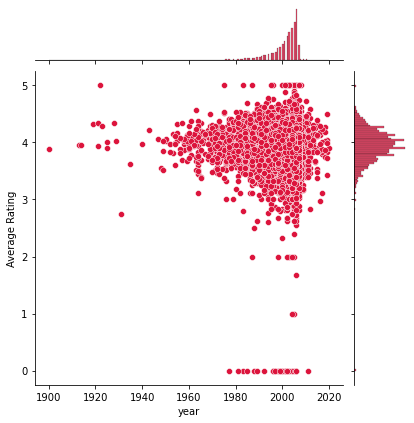

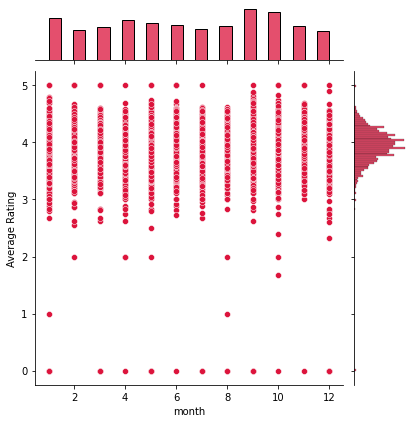

In [80]:
ax1 = sns.jointplot(y="average_rating", x="publication_year", data = df, color = 'crimson')
ax1.set_axis_labels("year", "Average Rating",)

ax2 = sns.jointplot(y="average_rating", x="publication_month", data = df, color = 'crimson')
ax2.set_axis_labels("month", "Average Rating")

## Pages

In [81]:
df.num_pages.describe()

count    11127.000000
mean       336.376921
std        241.127305
min          0.000000
25%        192.000000
50%        299.000000
75%        416.000000
max       6576.000000
Name: num_pages, dtype: float64

In [82]:
df.num_pages.value_counts().sort_index(axis = 0).head(30)

0     76
1     11
2     15
3     19
4     11
5     16
6     20
7      6
8     10
9     11
10    13
11     7
12    14
13     8
14    15
15     7
16    10
17     2
18     2
20     3
21     1
22     1
24    20
25     1
26     1
27     1
28     2
29     2
30     3
31     3
Name: num_pages, dtype: int64

In [83]:
df[df.num_pages == 1].head(15)

title  \
bookID                                                      
12582   Essential Welty: Why I Live at the P.O.  A Mem...   
15330   The Return of the King (The Lord of the Rings ...   
17872                                            Lobsters   
17873                                          Antibodies   
20971   Meditations for Manifesting: Morning and Eveni...   
21545              The Best American Mystery Stories 2003   
21703              The Best American Mystery Stories 2002   
22337                    The Neil Gaiman Audio Collection   
32668                                 LT's Theory of Pets   
35218      There Was a Cold Lady Who Swallowed Some Snow!   
44528                                             Matilda   

                                                  authors  average_rating  \
bookID                                                                      
12582                                        Eudora Welty            3.94   
15330                         Brian Sibley/J.R.R. Tolkien            4.35   
17872           Charles Stross/Shandra Marie/Jared Doreck            3.83   
17873           Charles Stross/Shandra Marie/Jared Doreck            3.46   
20971                                       Wayne W. Dyer            4.02   
21545                       Michael Connelly/Otto Penzler            3.60   
21703   James Ellroy/Otto Penzler/John Biguenet/Michae...            3.58   
22337                                         Neil Gaiman            4.24   
32668                                        Stephen King            3.69   
35218             Lucille Colandro/Jared Lee/Skip Hinnant            3.85   
44528   Roald Dahl/Rula Lenska/Sian Thomas/Christopher...            4.31   

       language_code  num_pages  ratings_count  text_reviews_count  \
bookID                                                               
12582            eng          1             92                  28   
15330            eng          1             17                   3   
17872            eng          1            158                   5   
17873            eng          1             67                   4   
20971            eng          1            338                  12   
21545            eng          1              5                   2   
21703            eng          1              0                   0   
22337            eng          1           1666                 208   
32668            eng          1           2824                 140   
35218            eng          1             14                   1   
44528            eng          1              6                   0   

       publication_date               publisher number_of_authors  \
bookID                                                              
12582        2006-06-27                 Caedmon            single   
15330        2002-03-04      BBC Audiobooks Ltd          multiple   
17872        2005-08-11               AudioText          multiple   
17873        2005-08-11               AudioText          multiple   
20971        1995-06-01               Hay House            single   
21545        2003-11-04           Mariner Books          multiple   
21703        2002-10-15           Mariner Books          multiple   
22337        2004-08-31          HarperFestival            single   
32668        2001-08-01   Simon  Schuster Audio            single   
35218        2006-08-13  Scholastic Audio Books          multiple   
44528        2005-03-03       Puffin Audiobooks          multiple   

          primary_author  publication_month  publication_year  
bookID                                                         
12582       Eudora Welty                  6              2006  
15330       Brian Sibley                  3              2002  
17872     Charles Stross                  8              2005  
17873     Charles Stross                  8              2005  
20971      Wayne W. Dyer                  6              1995  

* Num_pages == 0 to 15 seems to be Audio Books -> remove or create a new column AUDIBLE vs READABLE
***

In [84]:
publisher_df=df
publisher_df['publisher_group']=publisher_df.publisher.str[0]
publisher_df=publisher_df.groupby('publisher_group').publisher.value_counts().to_frame('counts').sort_values(by = ['publisher'])
print(publisher_df.to_string())

                                                                                     counts
publisher_group publisher                                                                  
1               1st Book Library                                                          1
                1st World Library                                                         1
A               A & C Black (Childrens books)                                             1
                A Harvest Book/Harcourt  Inc.                                             1
                A K PETERS                                                                1
                AA World Services                                                         1
                ACE                                                                       1
                ADV Manga                                                                10
                AHA! Process                                                    

In [85]:
audio_df=df[df.num_pages>24]
audio_df.sort_values(by = ['num_pages']).head(10)

title  \
bookID                                                      
2386                                            Moby Dick   
9072                                        The Historian   
45325   Joseph Cornell: Secrets in a Box (Adventures i...   
17296   Music of the Meadow (Little Einsteins Early Re...   
7615                         Farm Animals (A Chunky Book)   
44849   Code Check Electrical: An Illustrated Guide to...   
3051                      Sir Gawain and the Green Knight   
4601                    Click  Clack  Moo: Cows That Type   
26216                    Patrick: Patron Saint of Ireland   
6466    George Washington's Rules of Civility & Decent...   

                                                  authors  average_rating  \
bookID                                                                      
2386                     Herman Melville/William Hootkins            3.50   
9072          Elizabeth Kostova/Paul Michael/Justine Eyre            3.78   
45325   Alison Baverstock/Joseph Cornell/Christopher W...            4.03   
17296                  Susan Ring/Kelly Preston/Katie Nix            3.70   
7615                                          Phoebe Dunn            3.86   
44849    Michael      Casey/Redwood Kardon/Douglas Hansen            4.67   
3051               Selina Shirley Hastings/Juan Wijngaard            3.91   
4601                            Doreen Cronin/Betsy Lewin            4.24   
26216                                       Tomie dePaola            4.08   
6466                                    George Washington            4.08   

       language_code  num_pages  ratings_count  text_reviews_count  \
bookID                                                               
2386             eng         25             67                  17   
9072             eng         26            354                 135   
45325            eng         27             32                   5   
17296            eng         28             26                   1   
7615             eng         28             35                   4   
44849            eng         29              3                   0   
3051             eng         29             65                   9   
4601             eng         30            348                  33   
26216          en-US         30             89                   5   
6466             eng         30            835                 113   

       publication_date                             publisher  \
bookID                                                          
2386         2005-09-01                      Naxos Audiobooks   
9072         2005-12-13                         Books on Tape   
45325        2003-09-01                    Prestel Publishing   
17296        2006-09-01                          Disney Press   
7615         1984-02-12  Random House Books for Young Readers   
44849        2005-11-11                         Taunton Press   
3051         1991-06-27                      Walker Books Ltd   
4601         2003-06-01                          Pocket Books   
26216        1992-01-01                         Holiday House   
6466         1989-08-01                       Applewood Books   

       number_of_authors           primary_author  publication_month  \
bookID                                                                 
2386            multiple          Herman Melville                  9   
9072            multiple        Elizabeth Kostova                 12   
45325           multiple        Alison Baverstock                  9   
17296           multiple               Susan Ring                  9   
7615              single              Phoebe Dunn                  2   
44849           multiple       Michael      Casey                 11   
3051            multiple  Selina Shirley Hastings                  6   
4601            multiple            Doreen Cronin                  6   
26216             single            Tomie dePaola   

In [86]:
# look at different publisher name to see if audio book or not
keep= ["fono"]

#filter for rows that contain the partial string "Wes" in the conference column
df[df.publisher.str.contains('|'.join(keep))].sort_values(by = ['num_pages'])

# "Tantor Media"-containing publisher name = AUDIO (note: pages <= 6)
# "Caedmon"-containing publisher name = AUDIO (note: pages <= 11)
# "HarperFestival"-containing publisher name = AUDIO (note: 1 "book" counts 31 pages but it's 31 CDs)
# "Pimsleur"-containing publisher name = AUDIO (note: only 1 book)
# "FonoLibro"-containing publisher name = AUDIO (note: only 1 book - 18 pages
# "Disney Press", Warne" AND "TSR Inc" publish short book for kids
# "Studio"-containing publisher name = only paper book - to keep

Empty DataFrame
Columns: [title, authors, average_rating, language_code, num_pages, ratings_count, text_reviews_count, publication_date, publisher, number_of_authors, primary_author, publication_month, publication_year, publisher_group]
Index: []

Create new column "Type" with 2 categories: AUDIBLE or READABLE
* 1. Select title with CD
* 2. Apply on publisher based on the list ["Audio", "Record", "Sound", "Tape", "Tantor", "Warner Adult", "HarperFestival","Pimsleur", "FonoLibro"]
* 3. Apply on num_pages <=15 (assumption that all books with less (or equal) than 15 pages are Audio)

In [91]:
keep= ["Audio", "Record", "Sound", "Tape", "Tantor", "Warner Adult", "HarperFestival","Pimsleur", "FonoLibro"]
conditions = [df.authors == 'NOT A BOOK', df.title.str.contains('|'.join(["CD"])), df.publisher.str.contains('|'.join(keep)), df.num_pages <= 15]
choices =['audible','audible', 'audible','audible']                                                                                  
df['type'] = np.select(conditions, choices, default="readable")                                                                             
                                                                                  
#df[df.authors == 'NOT A BOOK']
df.head(15)

title  \
bookID                                                      
1       Harry Potter and the Half-Blood Prince (Harry ...   
2       Harry Potter and the Order of the Phoenix (Har...   
4       Harry Potter and the Chamber of Secrets (Harry...   
5       Harry Potter and the Prisoner of Azkaban (Harr...   
8       Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
9       Unauthorized Harry Potter Book Seven News: "Ha...   
10           Harry Potter Collection (Harry Potter  #1-6)   
12      The Ultimate Hitchhiker's Guide: Five Complete...   
13      The Ultimate Hitchhiker's Guide to the Galaxy ...   
14      The Hitchhiker's Guide to the Galaxy (Hitchhik...   
16      The Hitchhiker's Guide to the Galaxy (Hitchhik...   
18      The Ultimate Hitchhiker's Guide (Hitchhiker's ...   
21                   A Short History of Nearly Everything   
22                            Bill Bryson's African Diary   
23      Bryson's Dictionary of Troublesome Words: A Wr...   

                           authors  average_rating language_code  num_pages  \
bookID                                                                        
1       J.K. Rowling/Mary GrandPré            4.57           eng        652   
2       J.K. Rowling/Mary GrandPré            4.49           eng        870   
4                     J.K. Rowling            4.42           eng        352   
5       J.K. Rowling/Mary GrandPré            4.56           eng        435   
8       J.K. Rowling/Mary GrandPré            4.78           eng       2690   
9           W. Frederick Zimmerman            3.74         en-US        152   
10                    J.K. Rowling            4.73           eng       3342   
12                   Douglas Adams            4.38           eng        815   
13                   Douglas Adams            4.38           eng        815   
14                   Douglas Adams            4.22           eng        215   
16       Douglas Adams/Stephen Fry            4.22           eng          6   
18                   Douglas Adams            4.38           eng        815   
21                     Bill Bryson            4.21           eng        544   
22                     Bill Bryson            3.44           eng         55   
23                     Bill Bryson            3.87           eng        256   

        ratings_count  text_reviews_count publication_date  \
bookID                                                       
1             2095690               27591       2006-09-16   
2             2153167               29221       2004-09-01   
4                6333                 244       2003-11-01   
5             2339585               36325       2004-05-01   
8               41428                 164       2004-09-13   
9                  19                   1       2005-04-26   
10              28242                 808       2005-09-12   
12               3628                 254       2005-11-01   
13             249558                4080       2002-04-30   
14               4930                 460       2004-08-03   
16               1266                 253       2005-03-23   
18               2877                 195       1996-01-17   
21             248558                9396       2004-09-14   
22               7270                 499       2002-12-03   
23               2088                 131       2004-09-14   

                 publisher number_of_authors          primary_author  \
bookID                                                                 
1          Scholastic Inc.          multiple            J.K. Rowling   
2          Scholastic Inc.          multiple            J.K. Rowling   
4               Scholastic            single            J.K. Rowling   
5          Scholastic Inc.          multiple            J.K. Rowling   
8               Scholastic          multiple            J.K. Rowling   
9             Nimble Books            single  W. Frederick Zimmerman   
10              Scholastic            s

In [92]:
df.groupby(["type"]).describe().average_rating
#imbalanced 

count      mean       std  min     25%    50%   75%  max
type                                                                
audible     296.0  3.984155  0.420386  0.0  3.8275  4.005  4.20  5.0
readable  10831.0  3.932250  0.350324  0.0  3.7700  3.960  4.13  5.0

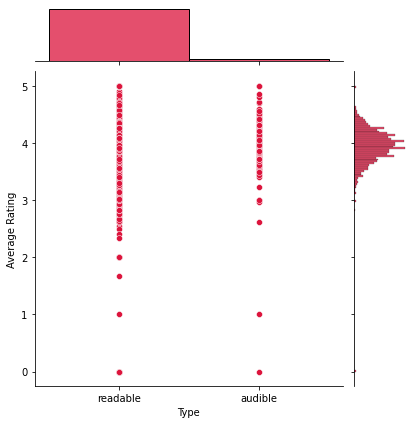

In [93]:
ax3 = sns.jointplot(y="average_rating", x="type", data = df, color = 'crimson')
ax3.set_axis_labels("Type", "Average Rating")

In [ ]:
#Replacing the 'num_pages' 0 values with the mean and checking the result
#df['num_pages'] = df['num_pages'].replace(0,df['num_pages'].mean())

In [200]:
#len(df[df.num_pages > 1500])

In [201]:
#Dropping outliers for 'num_pages' column 
#df = df.drop(index = df[df.num_pages > 1500].index)

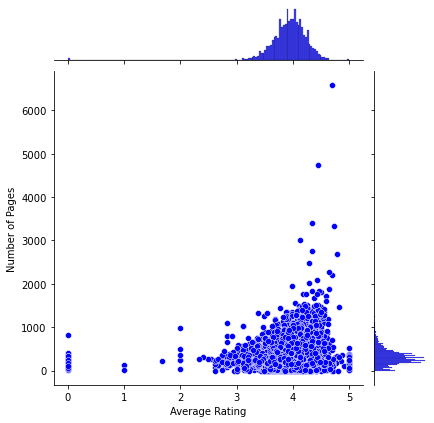

In [94]:
ax1 = sns.jointplot(x="average_rating", y="num_pages", data = df, color = 'blue')
ax1.set_axis_labels("Average Rating", "Number of Pages")

## Rating_count

In [32]:
len(df[df.ratings_count > 2000000])

11

In [33]:
#Dropping outliers for 'ratings_count' column 
df = df.drop(index = df[df.ratings_count > 2000000].index)

In [34]:
# Dropping the rows where the 'ratings_count' of a book is set to 0 and the average rating is different from 0 
df = df.drop(index = df[df.average_rating == 0].index)

## Text_Review

In [35]:
len(df[df.text_reviews_count > 50000])

4

In [36]:
#Dropping outliers for 'text_reviews_count' column 
df = df.drop(index = df[df.text_reviews_count > 50000].index)

##  Average_rating / ratings_counts / text_review_counts

In [95]:
print('Number of average_rating = 0: ', df['average_rating'].value_counts()[0])
print('Number of rating_counts = 0: ', df['ratings_count'].value_counts()[0])
print('Number of text_reviews_count = 0: ', df['text_reviews_count'].value_counts()[0])

#rating = 0 with rating_count = 0 -> is it relevant to keep it ro should we replace by the average rating?
# average_rating but no ratings_count or texte_reviews_count? how to consider them

Number of average_rating = 0:  26
Number of rating_counts = 0:  81
Number of text_reviews_count = 0:  625


In [96]:
df[df.average_rating==0].describe()

average_rating   num_pages  ratings_count  text_reviews_count  \
count            26.0   26.000000           26.0           26.000000   
mean              0.0  219.692308            0.0            0.038462   
std               0.0  169.046921            0.0            0.196116   
min               0.0    5.000000            0.0            0.000000   
25%               0.0  100.000000            0.0            0.000000   
50%               0.0  216.000000            0.0            0.000000   
75%               0.0  293.250000            0.0            0.000000   
max               0.0  830.000000            0.0            1.000000   

       publication_month  publication_year  
count          26.000000         26.000000  
mean            6.500000       1996.846154  
std             3.744329          8.446028  
min             1.000000       1977.000000  
25%             3.250000       1993.000000  
50%             6.500000       1999.000000  
75%             9.000000       2002.000000  
max            12.000000       2011.000000

In [97]:
df[df.average_rating==0].loc[df.text_reviews_count!=0]
#1 text review but no rating associated (ratings count =0)

title                   authors  average_rating language_code  \
bookID                                                                          
41044   Day and Night  Better Homes and Gardens             0.0           eng   

        num_pages  ratings_count  text_reviews_count publication_date  \
bookID                                                                  
41044          32              0                   1       1989-03-01   

                   publisher number_of_authors            primary_author  \
bookID                                                                     
41044   Meredith Corporation            single  Better Homes and Gardens   

        publication_month  publication_year publisher_group      type  
bookID                                                                 
41044                   3              1989               M  readable

Based on those observations, an average rating equal to 0 have a rating count equal to 0 and a text review equal to 0 <br>
There is only one case where we have a text review but still no rating count <br>
Those 26 rows (average rating = 0) are suspicious based on that.<br>

Remove or keep them (that could help predict a rating of 0 meaning that no one take the time to rate a book because it's too long!)
***

In [98]:
df=df.drop(df.loc[df.average_rating ==0].index)
df.describe()

average_rating     num_pages  ratings_count  text_reviews_count  \
count    11101.000000  11101.000000   1.110100e+04        11101.000000   
mean         3.942844    336.650212   1.797842e+04          543.123502   
std          0.296950    241.209946   1.126077e+05         2579.058368   
min          1.000000      0.000000   0.000000e+00            0.000000   
25%          3.780000    193.000000   1.050000e+02            9.000000   
50%          3.960000    300.000000   7.490000e+02           47.000000   
75%          4.140000    416.000000   5.019000e+03          239.000000   
max          5.000000   6576.000000   4.597666e+06        94265.000000   

       publication_month  publication_year  
count       11101.000000      11101.000000  
mean            6.546798       2000.175300  
std             3.413209          8.247188  
min             1.000000       1900.000000  
25%             4.000000       1998.000000  
50%             7.000000       2003.000000  
75%            10.000000       2005.000000  
max            12.000000       2020.000000

In [99]:
#print('Number of average_rating = 0: ', books_df_copy['average_rating'].value_counts()[0])
print('Number of rating_counts = 0: ', df['ratings_count'].value_counts()[0]) #80-26=54
print('Number of text_reviews_count = 0: ', df['text_reviews_count'].value_counts()[0])#622-26+1 ( text review=1)= 600

Number of rating_counts = 0:  55
Number of text_reviews_count = 0:  600


Still 55 rating_count equal to 0 whereas we have an average_rating at least equal to 1 => how can we have a rating without any count? <br> Let's dig a bit more
***

In [100]:
df[df.ratings_count==0].head(5)

title  \
bookID                                                      
797                                 Lonely Planet Londres   
1658    American Government: Continuity and Change  Al...   
1664    Essentials of American and Texas Government: C...   
2034    Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...   
2411    Melville and the politics of identity: From *K...   

                                          authors  average_rating  \
bookID                                                              
797     Lonely Planet/Sarah Johnstone/Tom Masters            4.03   
1658              Karen  O'Connor/Larry J. Sabato            2.83   
1664              Karen  O'Connor/Larry J. Sabato            3.50   
2034          Aristophanes/F.W. Hall/W.M. Geldart            5.00   
2411                               Julian Markels            3.33   

       language_code  num_pages  ratings_count  text_reviews_count  \
bookID                                                               
797              spa        480              0                   0   
1658             eng        664              0                   0   
1664             eng        854              0                   0   
2034             grc        364              0                   0   
2411             eng        164              0                   0   

       publication_date                     publisher number_of_authors  \
bookID                                                                    
797          2006-05-01                    Geoplaneta          multiple   
1658         2005-03-11      Longman Publishing Group          multiple   
1664         2005-07-29      Longman Publishing Group          multiple   
2034         1922-02-22  Oxford University Press  USA          multiple   
2411         1993-07-01  University of Illinois Press            single   

         primary_author  publication_month  publication_year publisher_group  \
bookID                                                                         
797       Lonely Planet                  5              2006               G   
1658    Karen  O'Connor                  3              2005               L   
1664    Karen  O'Connor                  7              2005               L   
2034       Aristophanes                  2              1922               O   
2411     Julian Markels                  7              1993               U   

            type  
bookID            
797     readable  
1658    readable  
1664    readable  
2034    readable  
2411    readable

Replace 0 by average ratings_counts or drop? **Replace** by mean ratings_counts

In [101]:
avg_rating_count=df[df['ratings_count']!=0].ratings_count.mean()
avg_rating_count

18067.936266521818

In [102]:
df.ratings_count.replace(to_replace = 0, value =avg_rating_count ,inplace = True)
df['ratings_count'].describe()

count    1.110100e+04
mean     1.806794e+04
std      1.126006e+05
min      1.000000e+00
25%      1.110000e+02
50%      7.780000e+02
75%      5.242000e+03
max      4.597666e+06
Name: ratings_count, dtype: float64

In [103]:
df['text_reviews_count'].describe()

count    11101.000000
mean       543.123502
std       2579.058368
min          0.000000
25%          9.000000
50%         47.000000
75%        239.000000
max      94265.000000
Name: text_reviews_count, dtype: float64

In [104]:
df['text_reviews_count'].value_counts()[0]

600

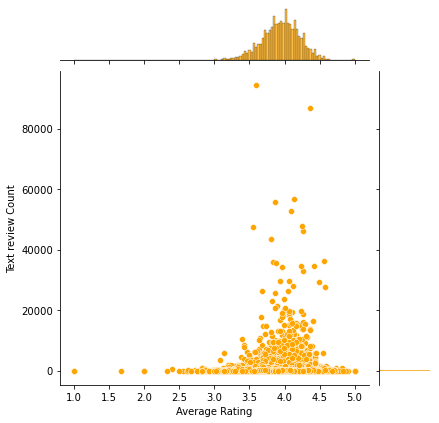

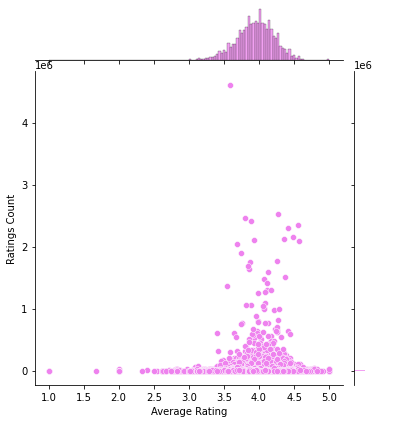

In [105]:
#Average Rating // Text Review Count
ax2 = sns.jointplot(x="average_rating", y="text_reviews_count", data = df, color = 'orange')
ax2.set_axis_labels("Average Rating", "Text review Count")

#drop text_reviews_count above 30000?

#Average Rating // Reviews Count
ax2 = sns.jointplot(x="average_rating", y="ratings_count", data = df, color = 'violet')
ax2.set_axis_labels("Average Rating", "Ratings Count")


plt.show()

In [199]:
# Dropping the rows where the  average rating of a book is set to 0 AND rating counts set to 0
#len(df.loc[(df[df.text_reviews_count == 0]) & (df['ratings_count'] == 0)])

## Visualization w/o outliers

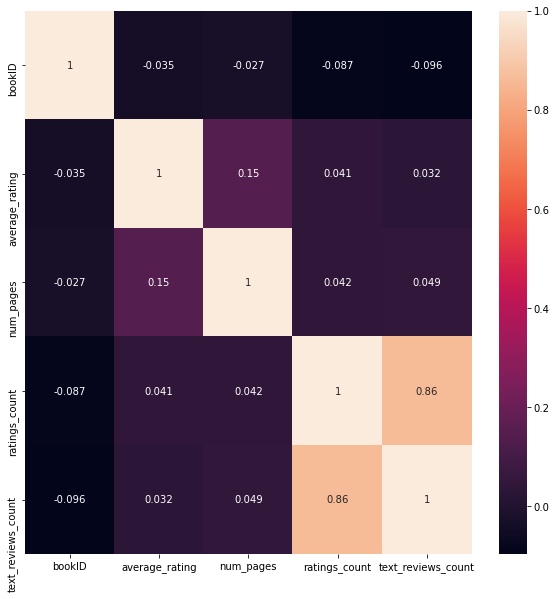

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 1080x720 with 0 Axes>

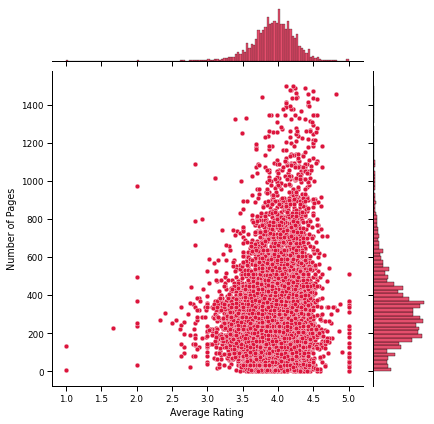

In [44]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="num_pages", data = df, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Pages")

Best rated books are between 180 and 420 pages

<Figure size 1080x720 with 0 Axes>

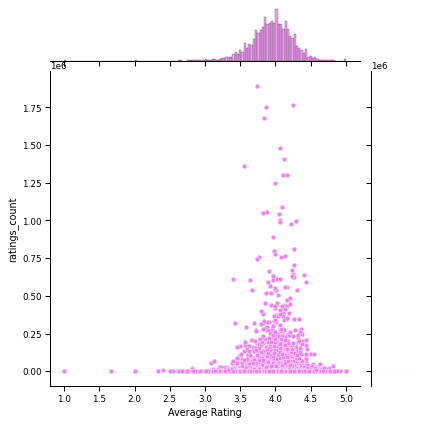

In [45]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="ratings_count", data = df, color = 'violet')
ax.set_axis_labels("Average Rating", "ratings_count")

<Figure size 1080x720 with 0 Axes>

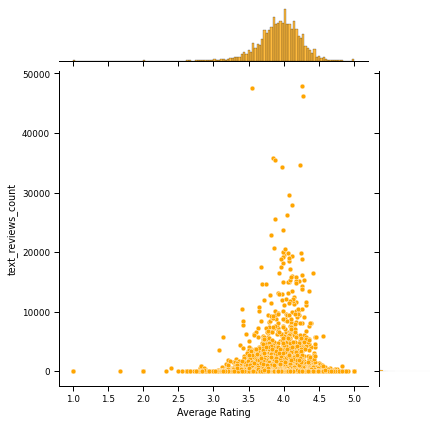

In [46]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="text_reviews_count", data = df, color = 'orange')
ax.set_axis_labels("Average Rating", "text_reviews_count")

# Next Steps

1. In the correlation section
   * Avg rating // language (visual)
   * Avg rating for top published authors over time (year) (bof)
   * Avg rating for top publishers over time (bof)
   * Corr month publication // avg rating / rating counts / text review
   * Corr year publication // avg rating / rating counts / text review
   

2. jointplot for text_reviews_count and ratings_count --> no histogram 

3. After dropping all outliers, how does the heatmap look like? 

4. Transforming categorical columns into numerical columns 
    * Title
    * Authors 
    * Language 
    * Publisher 

5. New column that identifies if the book has been written by a single or multiple authors
    Or trying to select only the first author of the book 

6. Identify similar publishers ??? 

7. Dropping the rows where the avg rating is 0

8. Dropping the rows where rating counts and text review counts are set to 0